<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


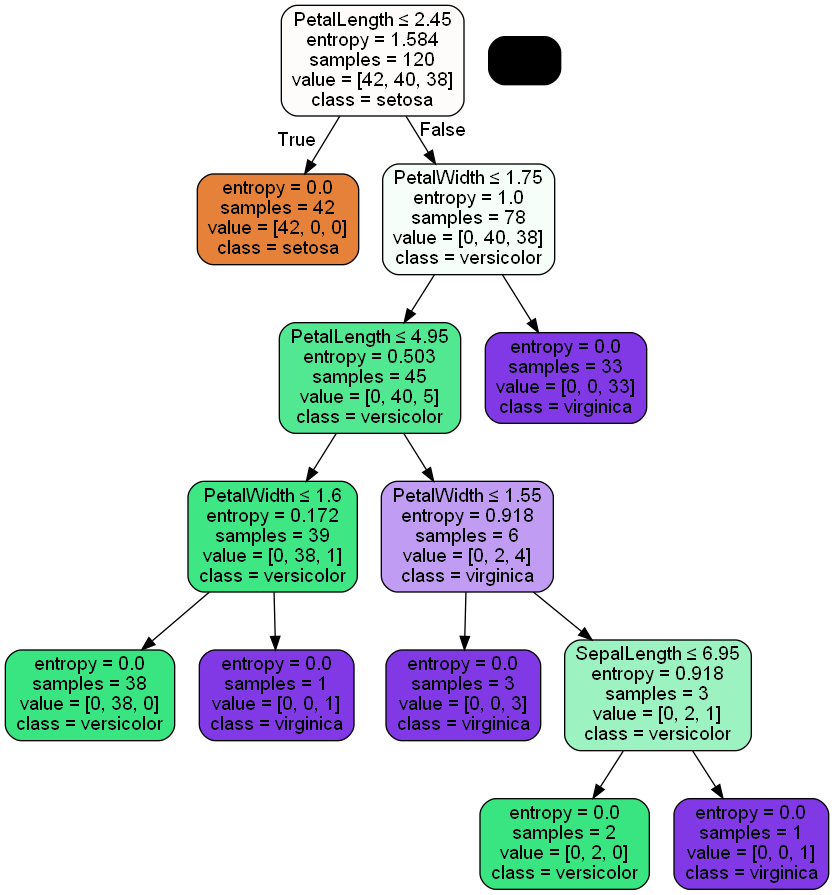

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# 라이브러리 불러오기

import pydotplus

from sklearn.tree import export_graphviz

from IPython.core.display import Image

iris = pd.read_csv("data_week13.csv")
# 목표변수와 나머지 변수들을 따로 저장
x = iris.iloc[:,1:5]
y = iris.iloc[:,5]

# 데이터 분포 확인

x.info()           # 데이터 프레임
y.value_counts()   # 시리즈

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.20)
Counter(y_train)
Counter(y_test)

# 의사결정트리 만들기 (엔트로피구하기, 트리2단계)
model = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
model

# 모델 학습
model.fit(x_train,y_train)

# test데이터 라벨 예측
y_pred = model.predict(x_test)
y_pred

# 정확도 계산
accuracy_score(y_test, y_pred)

# 입력변수들의 중요도 확인(확률값)
model.feature_importances_
pd.DataFrame({'feature' : x_train.columns,
              'importance' : model.feature_importances_})

# 모델의 정답에 대한 정보 확인
model.classes_

#그래프 설정
dot_data = export_graphviz(model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# 그래프 그리기
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
